In [11]:
import numpy as np
import pandas as pd

def calculate_class_iou(y_true, y_pred, num_classes):
    ious = []
    for cls in range(num_classes):
        true_class = list(map((lambda x: x == cls), y_true))
        pred_class = list(map((lambda x: x == cls), y_pred))
        intersection = np.logical_and(true_class, pred_class).sum()
        union = np.logical_or(true_class, pred_class).sum()
        
        if union == 0:
            iou = np.nan  # If there is no ground truth or prediction for this class, set IoU to NaN
        else:
            iou = intersection / union
        
        ious.append(iou)
    
    return ious

# Function to calculate IoUs for each class
def calculate_class_ious(ground_truth, prediction, num_classes):
    y_preds = []
    y_trues = []
    
    for y_true, y_pred in zip(ground_truth, prediction):
        y_preds.append(y_pred)
        y_trues.append(y_true)
        
    y_preds = np.concatenate(y_preds, axis=0)
    y_trues = np.concatenate(y_trues, axis=0)
    
    
    y_pred_argmax = list(map(find_palette_index, y_preds))
    y_true_argmax = list(map(find_palette_index, y_trues))
    
    class_ious = calculate_class_iou(y_true_argmax, y_pred_argmax, num_classes)
    return class_ious

In [12]:
def find_palette_index(x):
    r, g, b, = x
    return METAINFO['palette'].index((r.item(), g.item(), b.item()))

In [13]:
METAINFO = {
    "classes": (
        "unlabelled",
        "asphalt/concrete",
        "dirt",
        "mud",
        "water",
        "gravel",
        "other-terrain",
        "tree-trunk",
        "tree-foliage",
        "bush/shrub",
        "fence",
        "other-structure",
        "pole",
        "vehicle",
        "rock",
        "log",
        "other-object",
        "sky",
        "grass",
    ),
    "palette": [
        (0, 0, 0),
        (230, 25, 75),
        (60, 180, 75),
        (255, 225, 25),
        (0, 130, 200),
        (145, 30, 180),
        (70, 240, 240),
        (240, 50, 230),
        (210, 245, 60),
        (250, 190, 190),
        (0, 128, 128),
        (170, 110, 40),
        (255, 250, 200),
        (128, 0, 0),
        (170, 255, 195),
        (128, 128, 0),
        (255, 215, 180),
        (0, 0, 128),
        (128, 128, 128),
    ],
    "cidx": list(range(19))
}

In [14]:
classes = palette = METAINFO['classes']

def print_ious(class_ious):
    merged_classes = []
    merged_ious = []
    for idx, class_name in enumerate(classes):
        if class_name == "pole":
            # Merge pole IoU into other-object
            other_object_idx = classes.index("other-object")
            class_ious[other_object_idx] += class_ious[idx]
        elif class_name == "asphalt":
            # Merge asphalt IoU into other-terrain
            other_terrain_idx = classes.index("other-terrain")
            class_ious[other_terrain_idx] += class_ious[idx]
        elif class_name not in ["vehicle", "pole", "asphalt", "unlabelled"]:
            merged_classes.append(class_name)
            merged_ious.append(class_ious[idx])

    class_iou_pairs = list(zip(merged_classes, merged_ious))
    sorted_class_iou_pairs = sorted(class_iou_pairs, key=lambda x: x[0])
    # for class_name, iou in sorted_class_iou_pairs:
    #     print(f"Class {class_name} IoU: {iou * 100: .2f}")

    MIou = np.nanmean(merged_ious)
    # print(f"Mean IoU: {MIou * 100: .2f}")
    return MIou

superpixels 2000
superpixels 5000
superpixels 10000


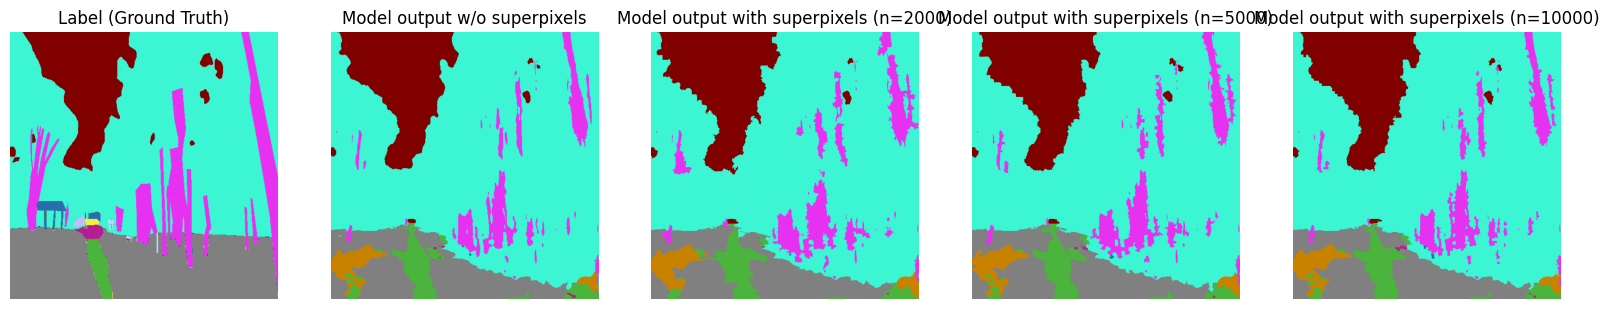

superpixels 2000
superpixels 5000
superpixels 10000


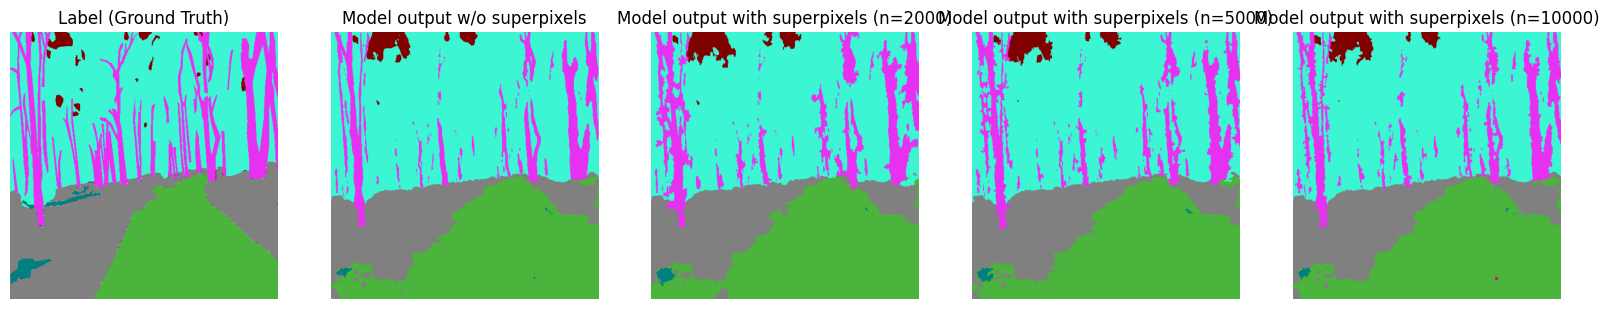

superpixels 2000
superpixels 5000
superpixels 10000


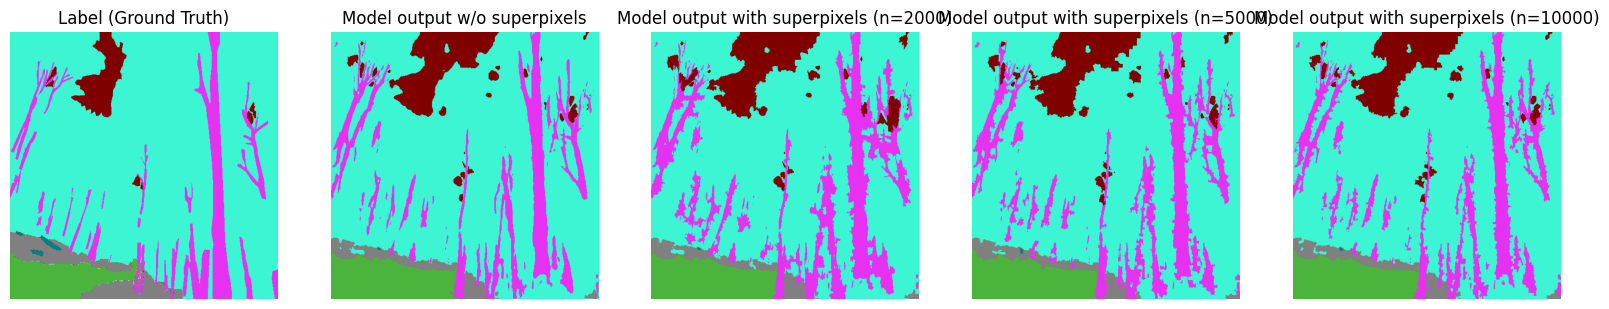

superpixels 2000
superpixels 5000
superpixels 10000


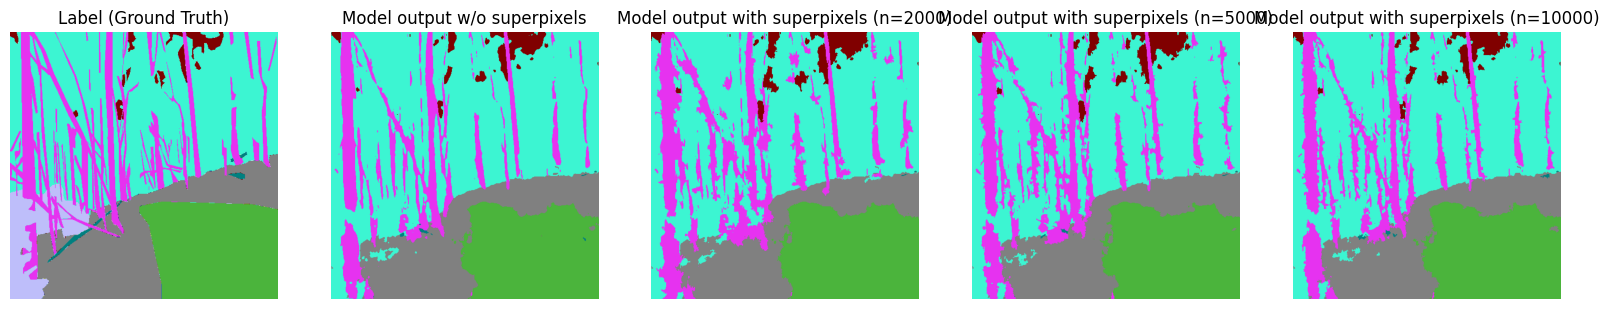

superpixels 2000
superpixels 5000
superpixels 10000


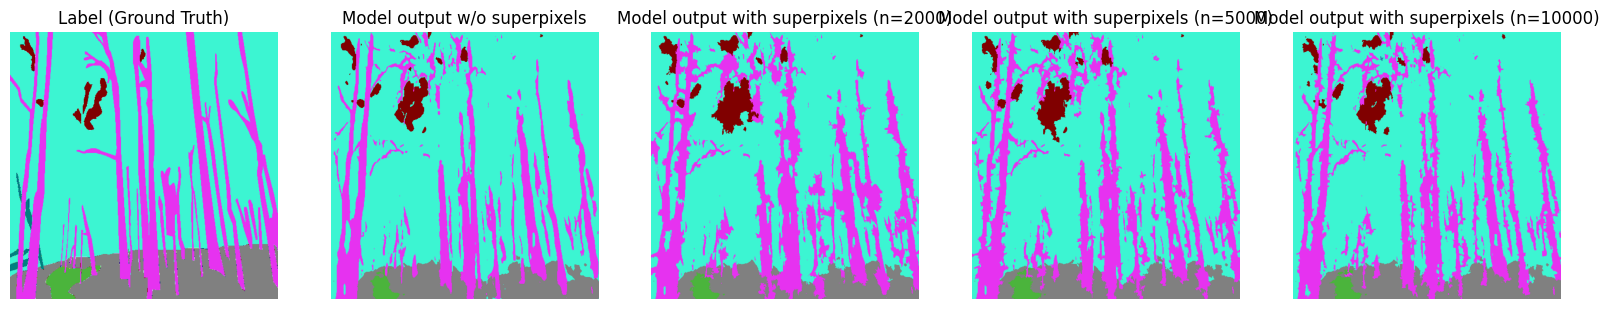

superpixels 2000
superpixels 5000
superpixels 10000


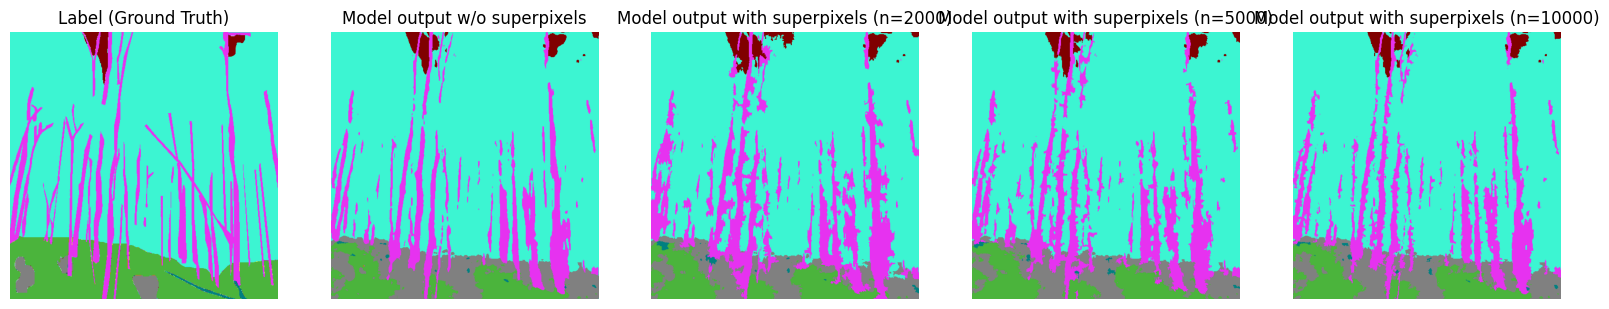

superpixels 2000
superpixels 5000
superpixels 10000


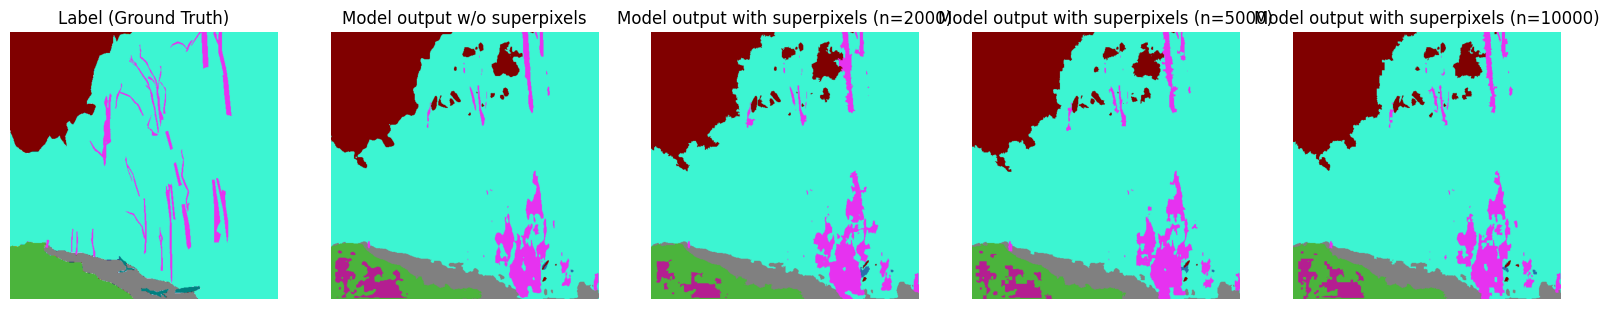

superpixels 2000
superpixels 5000
superpixels 10000


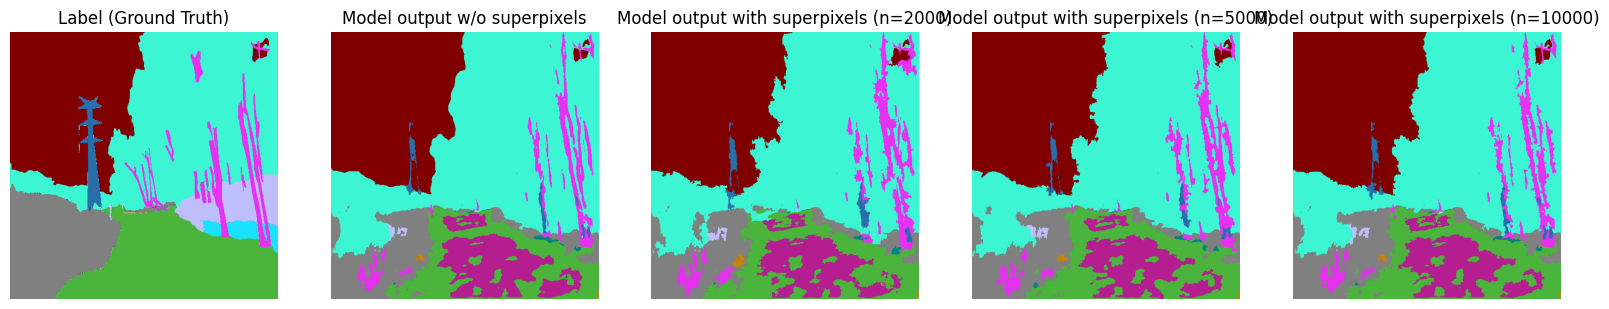

superpixels 2000
superpixels 5000
superpixels 10000


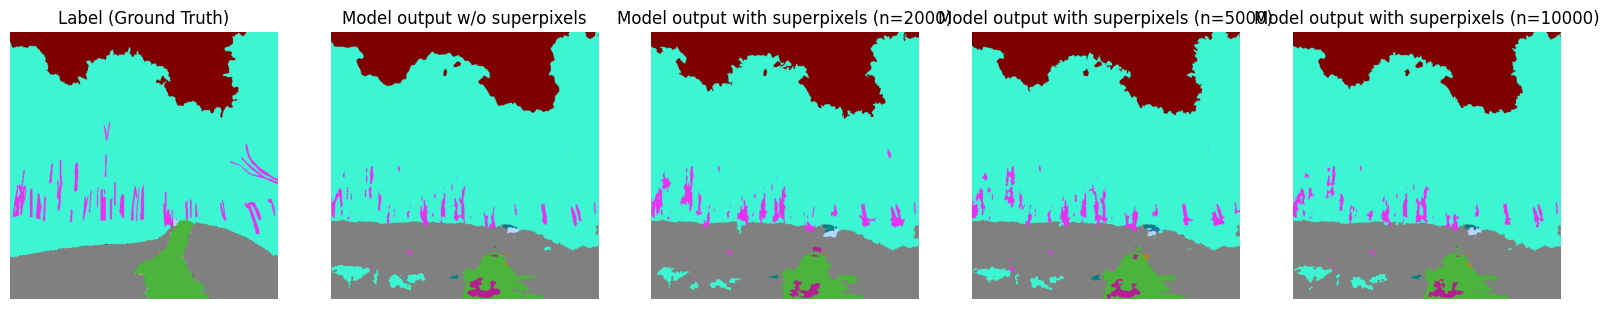

superpixels 2000
superpixels 5000
superpixels 10000


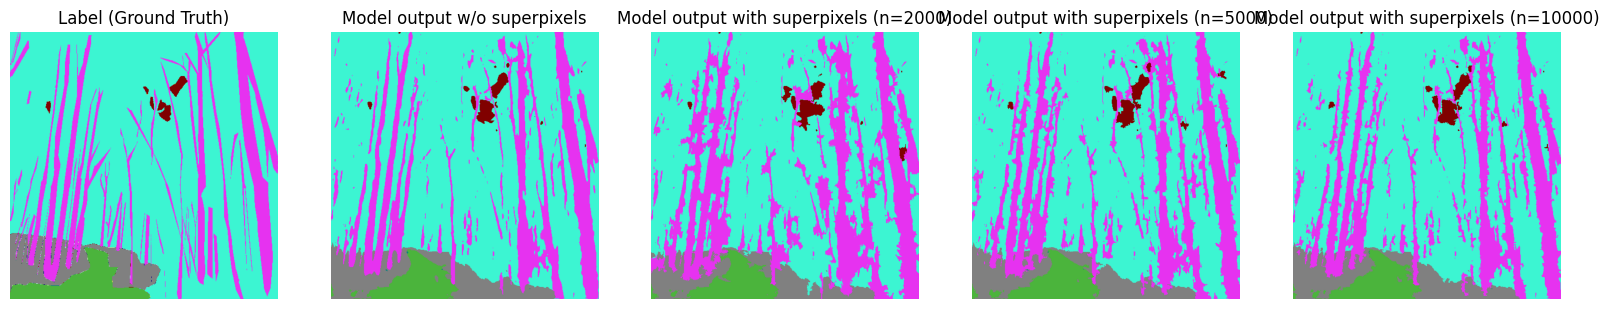

Original:0.201
superpixels (n=2000):0.189
superpixels (n=5000):0.194
superpixels (n=10000):0.197


In [15]:
from matplotlib import pyplot as plt
import cv2
import superpixel
import importlib
importlib.reload(superpixel)

mean_iou = []
mean_iou_superpixels_1 = []
mean_iou_superpixels_2 = []
mean_iou_superpixels_3 = []

superpixel_parameters = [2000, 5000, 10000]

for i in range(10):
    image_path = 'crf_2/img' + str(i) + '.png'
    label_path = 'crf_2/label' + str(i) + '.png'
    pred_path = 'crf_2/pred' + str(i) + '.png'
    
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    label = cv2.imread(label_path, cv2.IMREAD_COLOR)
    pred = cv2.imread(pred_path, cv2.IMREAD_COLOR)
    x, y, c = label.shape
    image = cv2.resize(image, (x, y))
    
    print('superpixels', superpixel_parameters[0])
    superpixels1 = superpixel.superpixel_run(image, pred, n_segments=superpixel_parameters[0])
    
    print('superpixels', superpixel_parameters[1])
    superpixels2 = superpixel.superpixel_run(image, pred, n_segments=superpixel_parameters[1])
    
    print('superpixels', superpixel_parameters[2])
    superpixels3 = superpixel.superpixel_run(image, pred, n_segments=superpixel_parameters[2])
        
    plt.figure(figsize=(20, 20))
        
    plt.subplot(1, 5, 1)
    plt.title('Label')
    plt.axis("off")
    plt.imshow(cv2.cvtColor(label, cv2.COLOR_RGB2BGR))
    
    plt.subplot(1, 5, 2)
    plt.title('Prediction')
    plt.axis("off")
    plt.imshow(cv2.cvtColor(pred, cv2.COLOR_RGB2BGR))
    
    plt.subplot(1, 5, 3)
    plt.title(f'Superpixels (n={superpixel_parameters[0]})')
    plt.axis("off")
    plt.imshow(cv2.cvtColor(superpixels1, cv2.COLOR_RGB2BGR))
    
    plt.subplot(1, 5, 4)
    plt.title(f'Superpixels (n={superpixel_parameters[1]})')
    plt.axis("off")
    plt.imshow(cv2.cvtColor(superpixels2, cv2.COLOR_RGB2BGR))
    
    plt.subplot(1, 5, 5)
    plt.title(f'Superpixels (n={superpixel_parameters[2]})')
    plt.axis("off")
    plt.imshow(cv2.cvtColor(superpixels3, cv2.COLOR_RGB2BGR))
    plt.show()
    
    # Calculate and print IoU for each class
    ious = calculate_class_ious(label, pred, 19)
    iou = print_ious(ious)
    mean_iou.append(iou)
    
    ious_superpixels_1 = calculate_class_ious(label, superpixels1, 19)
    iou_superpixels_1 = print_ious(ious_superpixels_1)
    mean_iou_superpixels_1.append(iou_superpixels_1)
    
    ious_superpixels_2 = calculate_class_ious(label, superpixels2, 19)
    iou_superpixels_2 = print_ious(ious_superpixels_2)
    mean_iou_superpixels_2.append(iou_superpixels_2)
    
    ious_superpixels_3 = calculate_class_ious(label, superpixels3, 19)
    iou_superpixels_3 = print_ious(ious_superpixels_3)
    mean_iou_superpixels_3.append(iou_superpixels_3)

print(f"Original:{round(np.nanmean(mean_iou), 3)}")
print(f"superpixels (n={superpixel_parameters[0]}):{round(np.nanmean(mean_iou_superpixels_1), 3)}")
print(f"superpixels (n={superpixel_parameters[1]}):{round(np.nanmean(mean_iou_superpixels_2), 3)}")
print(f"superpixels (n={superpixel_parameters[2]}):{round(np.nanmean(mean_iou_superpixels_3), 3)}")

In [35]:
from matplotlib import pyplot as plt
import cv2
import superpixel
import importlib
importlib.reload(superpixel)


superpixel_parameters = [i for i in range(2000, 10001, 2000)]
mean_ious = []

for parameters in superpixel_parameters:
    print(f"Parameters = {parameters}")    
    superpixels = []
    ious = []
    total_images = 10
    for i in range(total_images):
        print(f'    Image {i+1}/{total_images}')
        image_path = 'crf_2/img' + str(i) + '.png'
        label_path = 'crf_2/label' + str(i) + '.png'
        pred_path = 'crf_2/pred' + str(i) + '.png'
        
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        label = cv2.imread(label_path, cv2.IMREAD_COLOR)
        pred = cv2.imread(pred_path, cv2.IMREAD_COLOR)
        x, y, c = label.shape
        image = cv2.resize(image, (x, y))
        
        # Computer the superpixel
        sp = superpixel.superpixel_run(image, pred, n_segments=parameters)

        # Calculate and print IoU for each class
        iou = print_ious(calculate_class_ious(label, sp, 19))
        ious.append(iou)
        
    mean_iou = np.nanmean(ious)
    print(f"superpixels (n={parameters}):{round(mean_iou, 3)}")
    mean_ious.append(mean_iou)


Parameters = 2000
    Image 1/10
    Image 2/10
    Image 3/10
    Image 4/10
    Image 5/10
    Image 6/10
    Image 7/10
    Image 8/10
    Image 9/10
    Image 10/10
superpixels (n=2000):0.189
Parameters = 4000
    Image 1/10
    Image 2/10
    Image 3/10
    Image 4/10
    Image 5/10
    Image 6/10
    Image 7/10
    Image 8/10
    Image 9/10
    Image 10/10
superpixels (n=4000):0.192
Parameters = 6000
    Image 1/10
    Image 2/10
    Image 3/10
    Image 4/10
    Image 5/10
    Image 6/10
    Image 7/10
    Image 8/10
    Image 9/10
    Image 10/10
superpixels (n=6000):0.194
Parameters = 8000
    Image 1/10
    Image 2/10
    Image 3/10
    Image 4/10
    Image 5/10
    Image 6/10
    Image 7/10
    Image 8/10
    Image 9/10
    Image 10/10
superpixels (n=8000):0.196
Parameters = 10000
    Image 1/10
    Image 2/10
    Image 3/10
    Image 4/10
    Image 5/10
    Image 6/10
    Image 7/10
    Image 8/10
    Image 9/10
    Image 10/10
superpixels (n=10000):0.197


In [36]:
for parameters in superpixel_parameters:
    print(f"Parameters = {parameters}")    
    superpixels = []
    ious = []
    total_images = 10
    for i in range(total_images):
        print(f'    Image {i+1}/{total_images}')
        image_path = 'crf_2/img' + str(i) + '.png'
        label_path = 'crf_2/label' + str(i) + '.png'
        pred_path = 'crf_2/pred' + str(i) + '.png'
        
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        label = cv2.imread(label_path, cv2.IMREAD_COLOR)
        pred = cv2.imread(pred_path, cv2.IMREAD_COLOR)
        x, y, c = label.shape
        image = cv2.resize(image, (x, y))

        # Calculate and print IoU for each class
        iou = print_ious(calculate_class_ious(label, pred, 19))
        ious.append(iou)

    mean_iou = np.nanmean(ious)
    original_iou = mean_iou
original_iou

Parameters = 2000
    Image 1/10
    Image 2/10
    Image 3/10
    Image 4/10
    Image 5/10
    Image 6/10
    Image 7/10
    Image 8/10
    Image 9/10
    Image 10/10
Parameters = 4000
    Image 1/10
    Image 2/10
    Image 3/10
    Image 4/10
    Image 5/10
    Image 6/10
    Image 7/10
    Image 8/10
    Image 9/10
    Image 10/10
Parameters = 6000
    Image 1/10
    Image 2/10
    Image 3/10
    Image 4/10
    Image 5/10
    Image 6/10
    Image 7/10
    Image 8/10
    Image 9/10
    Image 10/10
Parameters = 8000
    Image 1/10
    Image 2/10
    Image 3/10
    Image 4/10
    Image 5/10
    Image 6/10
    Image 7/10
    Image 8/10
    Image 9/10
    Image 10/10
Parameters = 10000
    Image 1/10
    Image 2/10
    Image 3/10
    Image 4/10
    Image 5/10
    Image 6/10
    Image 7/10
    Image 8/10
    Image 9/10
    Image 10/10


np.float64(0.20120551710477078)

In [41]:
original_iou

np.float64(0.20120551710477078)

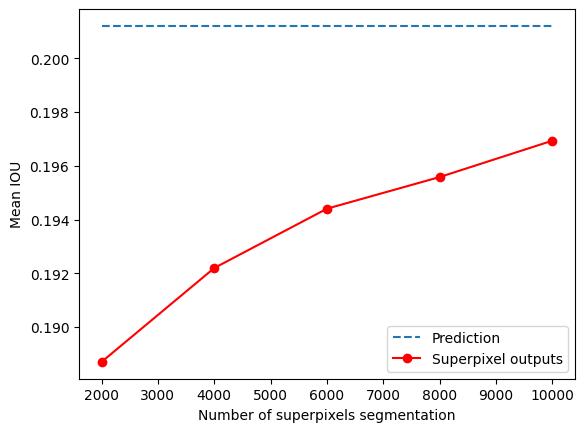

In [45]:
plt.plot([2000, 10000], [original_iou, original_iou], '--', label='Prediction')
plt.plot(superpixel_parameters, mean_ious,'ro-', label='Superpixel outputs')
plt.xlabel('Number of superpixels segmentation')
plt.legend(loc="lower right")
plt.ylabel('Mean IOU')
plt.show()